# Direct Comparison MUT T0 v T2
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData

## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/S64F_gene_count.txt', index_col=18, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAS64F_001,611586,314216,328546,267945,135623,122556,169291,198632,113766,95446,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_002,575049,409669,243106,184948,187221,88068,124960,108400,116860,134805,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_003,824730,218574,321668,278746,92467,111493,152005,118341,80843,71644,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_004,858370,262758,351032,358769,109622,134079,175299,232638,115243,58507,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_005,828227,500390,312265,281623,228104,110909,158423,149446,154143,164299,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_006,882622,241947,252381,210988,113488,104409,103355,75316,88540,91730,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_007,698088,281983,336437,280200,118392,117157,164344,222087,105979,86190,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_008,695656,403657,227741,176757,183399,79146,98225,93109,120291,131636,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_009,656783,205008,214125,229070,97473,115874,111309,52115,74326,77237,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_010,992861,158438,381157,341457,70606,135710,161331,154493,49674,52146,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData_Mut.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAS64F_001,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_002,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_003,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_004,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_005,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_006,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_007,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_008,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_009,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_004,Control,T2,Y
MAFAS64F_005,Control,T2,Y
MAFAS64F_006,Control,T2,Y
MAFAS64F_007,Control,T1,Y
MAFAS64F_008,Control,T1,Y
MAFAS64F_009,Control,T1,Y
MAFAS64F_010,MAFA,T0,N


In [6]:
# split data set by timepoint
subset_t0 = adata[adata.obs.time_point == 'T0']
subset_t2 = adata[adata.obs.time_point == 'T2']
#split by condition to remove control
subset_t0 = subset_t0[subset_t0.obs.condition == "MAFA"]
#rename T0 to control
subset_t0.obs.condition = "Control"

subset_t2 = subset_t2[subset_t2.obs.condition == "MAFA"]
#combine
adata = ad.concat([subset_t0, subset_t2], axis = 0)

adata.obs

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/generic.py:6234: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


,condition,time_point,DOX
MAFAS64F_010,Control,T0,N
MAFAS64F_011,Control,T0,N
MAFAS64F_012,Control,T0,N
MAFAS64F_013,MAFA,T2,Y
MAFAS64F_014,MAFA,T2,Y
MAFAS64F_015,MAFA,T2,Y


## Quality Control

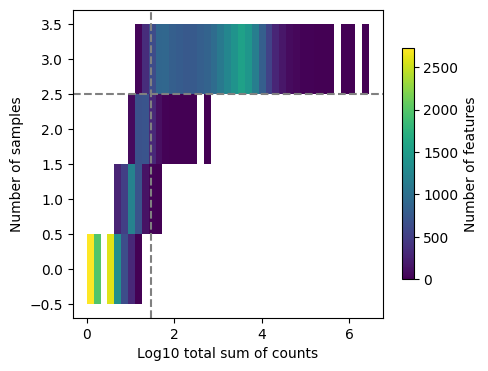

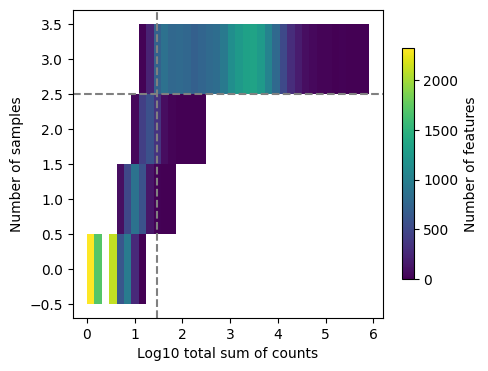

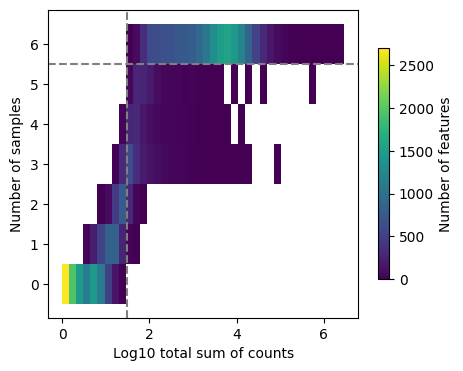

In [7]:
#check various filter points
dc.plot_filter_by_expr(subset_t0, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(subset_t2, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(adata, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)

In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15040

In [9]:
# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 6 × 15040
    obs: 'condition', 'time_point', 'DOX'

In [10]:
!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 19.71 seconds.

Fitting dispersion trend curve...
... done in 4.08 seconds.

Fitting MAP dispersions...
... done in 20.77 seconds.

Fitting LFCs...
... done in 1.56 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=['condition', 'MAFA', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 0.89 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,434482.500000,-4.371074,0.134655,-32.461228,3.761117e-231,3.089871e-229
MT-CO1,273319.906250,0.216884,0.463713,0.467712,6.399909e-01,6.946519e-01
GCG,156897.937500,-6.350675,0.484381,-13.110897,2.852060e-39,2.296619e-38
INS,139876.593750,-5.389207,0.421249,-12.793411,1.784655e-37,1.378751e-36
MT-ND4,134904.796875,0.549811,0.453276,1.212971,2.251407e-01,2.791559e-01
...,...,...,...,...,...,...
LINC01798,17.702196,1.219382,0.298129,4.090114,4.311613e-05,9.054448e-05
CATIP,14.078345,0.033542,0.526989,0.063648,9.492505e-01,9.598488e-01
RPS20P33,12.876544,-0.036894,0.535703,-0.068871,9.450923e-01,9.571248e-01


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_MAFA_vs_Control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 3.67 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,434482.500000,-4.036809,0.146578,-32.461228,3.761117e-231,3.089871e-229
MT-CO1,273319.906250,2.215415,0.499159,0.467712,6.399909e-01,6.946519e-01
GCG,156897.937500,-1.287194,1.348948,-13.110897,2.852060e-39,2.296619e-38
INS,139876.593750,-1.327855,0.906140,-12.793411,1.784655e-37,1.378751e-36
MT-ND4,134904.796875,2.484377,0.491220,1.212971,2.251407e-01,2.791559e-01
...,...,...,...,...,...,...
LINC01798,17.702196,-0.144270,0.847138,4.090114,4.311613e-05,9.054448e-05
CATIP,14.078345,0.026249,0.488502,0.063648,9.492505e-01,9.598488e-01
RPS20P33,12.876544,-0.026963,0.494916,-0.068871,9.450923e-01,9.571248e-01


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,434482.500000,-4.036809,0.146578,-32.461228,3.761117e-231,3.089871e-229
MT-CO1,273319.906250,2.215415,0.499159,0.467712,6.399909e-01,6.946519e-01
GCG,156897.937500,-1.287194,1.348948,-13.110897,2.852060e-39,2.296619e-38
INS,139876.593750,-1.327855,0.906140,-12.793411,1.784655e-37,1.378751e-36
MT-ND4,134904.796875,2.484377,0.491220,1.212971,2.251407e-01,2.791559e-01
...,...,...,...,...,...,...
LINC01798,17.702196,-0.144270,0.847138,4.090114,4.311613e-05,9.054448e-05
CATIP,14.078345,0.026249,0.488502,0.063648,9.492505e-01,9.598488e-01
RPS20P33,12.876544,-0.026963,0.494916,-0.068871,9.450923e-01,9.571248e-01


In [19]:
!pip install adjustText

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


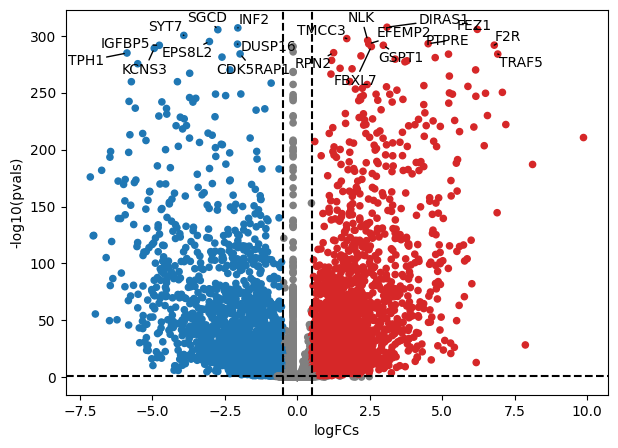

In [20]:
dc.plot_volcano_df(results_df, x='log2FoldChange', y='padj', top=20, save='../figures/direct/MUT_T0_T2/volcano.png')

In [21]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,KLHL7-DT,AC087071.2,MT-TS2,AL359962.1,AC131206.1,LINC01798,CATIP,RPS20P33,ALMS1P1,AC104131.1
treatment.vs.control,-32.461228,0.467712,-13.110897,-12.793411,1.212971,-1.425707,-33.000761,-8.733365,0.457172,0.524374,...,2.306532,0.616107,1.29387,3.476893,-0.392866,4.090114,0.063648,-0.068871,-0.196603,-0.080165


### Transcription factor activity inference

In [22]:
collectri = dc.get_collectri(organism='human')
collectri

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


### Activity inference with Univariate Linear Model (ULM)

In [23]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 15040 targets for 636 sources.


,ABL1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-0.976915,-2.839652,0.587235,-2.568124,-1.081455,-0.934483,2.273013,-0.987167,-0.302132,-2.317005,...,-1.010504,-0.563175,0.359556,-0.150289,-0.433582,2.604998,-0.727318,-0.12672,0.181801,-0.737733


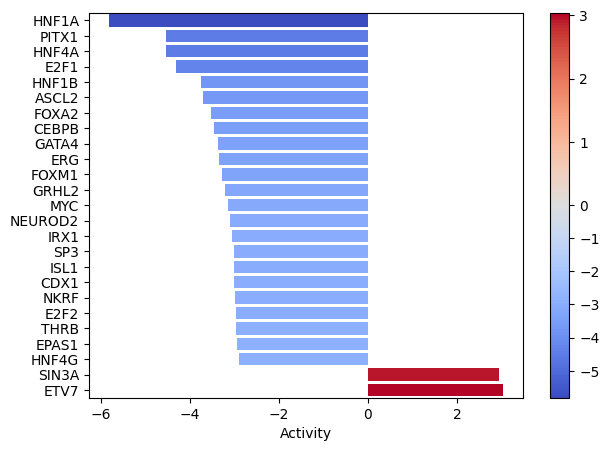

In [24]:
dc.plot_barplot(tf_acts, 'treatment.vs.control', top=25, vertical=True,save='../figures/direct/MUT_T0_T2/tf_activities.png')

In [25]:
# dc.plot_targets(results_df, stat='stat', source_name='PREB', net=collectri, top=15,save='../figures/direct/MUT_T0_T2/SIX1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='GLIS3', net=collectri, top=15,save='../figures/direct/MUT_T0_T2/BCL11B_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/direct/MUT_T0_T2/MAFA_targets.png')
#

# Plot Networks

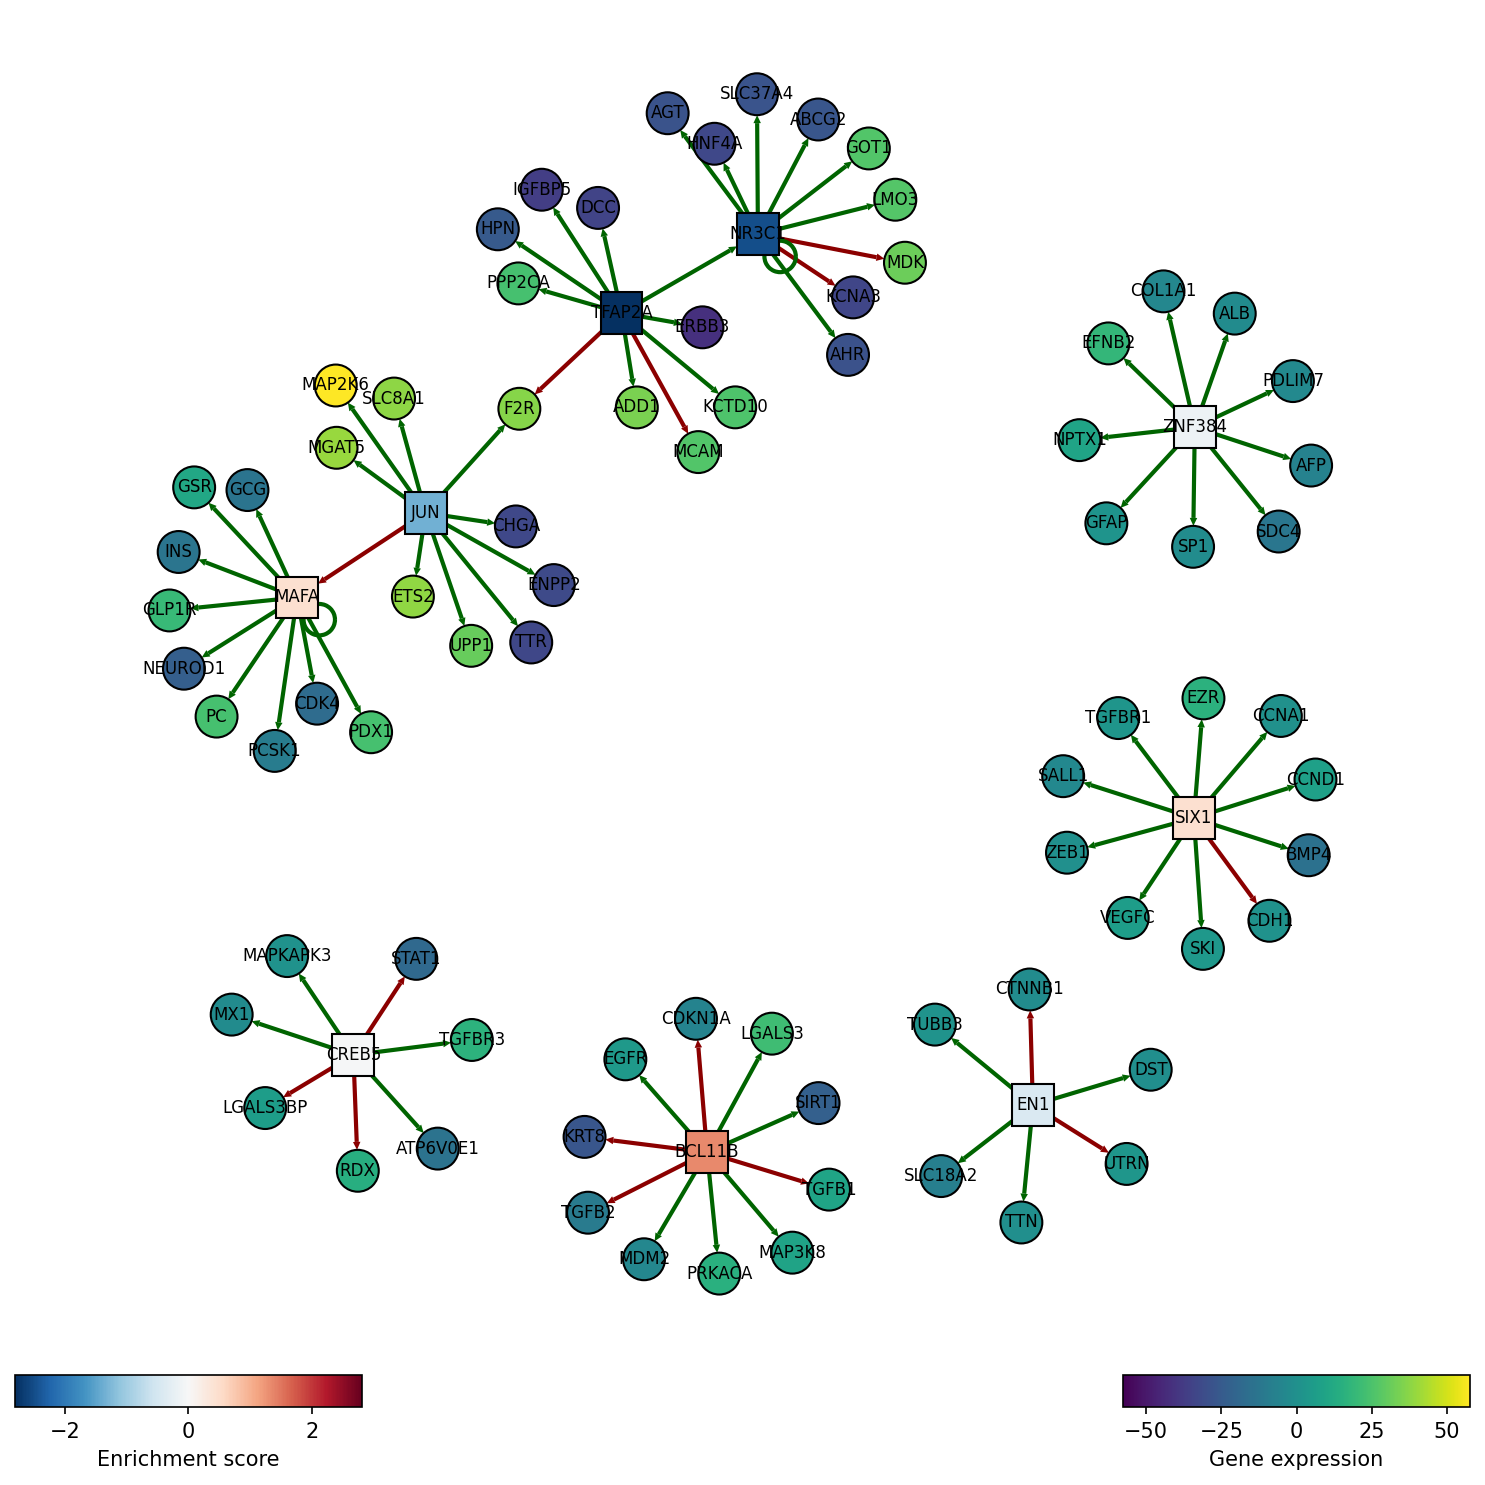

In [26]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['SIX1', 'BCL11B', 'EN1', 'CREB5', 'ZNF384', 'TFAP2A', 'NR3C1', 'JUN', 'MAFA'],
    n_targets=10,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/direct/MUT_T0_T2/plot_networks.png'
)

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


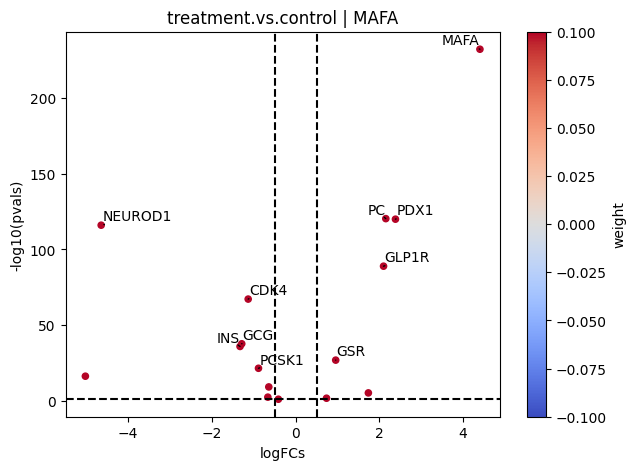

In [27]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [28]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [29]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 15040 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
treatment.vs.control,0.644358,0.358994,0.72165,1.086239,-5.073081,-1.101185,0.114953,-2.695829,0.273573,-0.170722,-1.435531,-0.224056,-3.16755,-0.068597


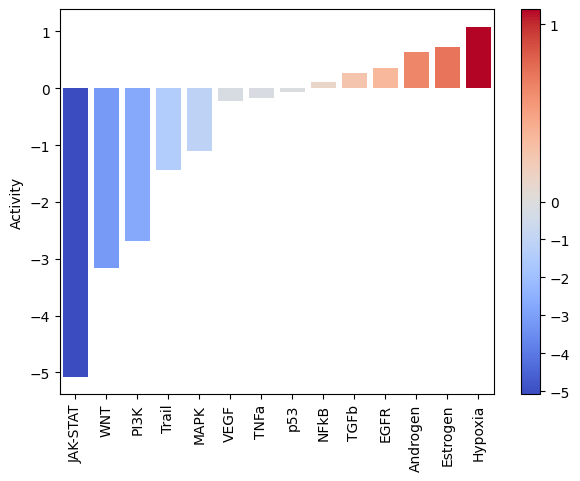

In [30]:
dc.plot_barplot(pathway_acts, 'treatment.vs.control', top=30, vertical=False,save='../figures/direct/MUT_T0_T2/pathway_activities.png')

In [31]:
# dc.plot_targets(results_df, stat='stat', source_name='p53', net=progeny, top=30,save='../figures/direct/MUT_T0_T2/p53_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='Androgen', net=progeny, top=20,save='../figures/direct/MUT_T0_T2/Androgen_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='JAK-STAT', net=progeny, top=20, save='../figures/direct/MUT_T0_T2/JAK-STAT_targets.png')

# Approach to investigate p53 -> PPI -> mechanism? -> ask -> Table with list of targets for each one of the pathways with statistics 

### Funtional enrichment of Biological Terms

In [32]:
# The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
msigdb = dc.get_resource('MSigDB')
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [33]:
msigdb['collection'].unique()

['chemical_and_genetic_perturbations', 'immunesigdb', 'mirna_targets_mirdb', 'go_molecular_function', 'tf_targets_gtrf', ..., 'biocarta_pathways', 'positional', 'human_phenotype_ontology', 'pid_pathways', 'kegg_pathways']
Length: 22
Categories (22, string): [biocarta_pathways, cancer_gene_neighborhoods, cancer_modules, cell_type_signatures, ..., tf_targets_gtrf, tf_targets_legacy, vaccine_response, wikipathways]

In [34]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
233,MAFF,hallmark,IL2_STAT5_SIGNALING
250,MAFF,hallmark,COAGULATION
270,MAFF,hallmark,HYPOXIA
373,MAFF,hallmark,TNFA_SIGNALING_VIA_NFKB
377,MAFF,hallmark,COMPLEMENT
...,...,...,...
1449668,STXBP1,hallmark,PANCREAS_BETA_CELLS
1450315,ELP4,hallmark,PANCREAS_BETA_CELLS
1450526,GCG,hallmark,PANCREAS_BETA_CELLS
1450731,PCSK2,hallmark,PANCREAS_BETA_CELLS
